# Demo grouped_stackedbars graph

Graph to compare different entities (shading) in terms of multiple criteria (y-axis) and broken down in terms of their contributing parts (colors).

In [1]:
# Typical packages
import pandas as pd
import numpy as np
import seaborn as sns
import sys

# Import module of interest
sys.path.append('/home/bill/software/lca_standard_graphs/')
import lca_standard_graphs as lsg

# For smooth display in gitlab rendering
pd.options.display.multi_sparse = False


## Generic Example: stacked bars with 2 scenarios (df1, df2) with two contributors (zI, yJ) compared in terms of 4 criteria (A, B, C, D)

Note that the contributors (the columns of the dataframes) are _not_ in alphabetical order.

In [2]:
# Define dataframes
df1=pd.DataFrame(np.random.rand(4,2),index=["A","B","C","D"],columns=["zI","yJ"])
df1.index.name='Criteria'

df2=pd.DataFrame(np.random.rand(4,2),index=["A","B","C","D"],columns=["zI","yJ"])
df2.index.name='Criteria'

# Build comparison table
comp = lsg.build_comparison_table([df1, df2], ['df1', 'df2'], fillna=0.0)
comp

,,zI,yJ
Criteria,Scenarios,,
A,df1,0.927716,0.480594
A,df2,0.966571,0.470580
B,df1,0.770011,0.090160
B,df2,0.120742,0.357549
C,df1,0.719729,0.245818
C,df2,0.551405,0.688118
D,df1,0.939548,0.218458
D,df2,0.670951,0.960518


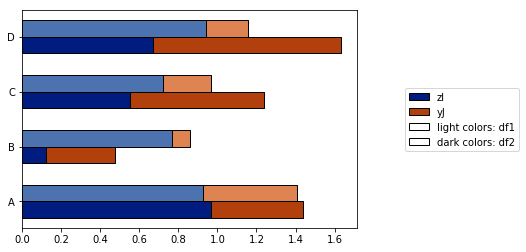

In [3]:
# Plot comparison
_ = lsg.plot_grouped_stackedbars(comp, ix_categories='Criteria', ix_entities_compared='Scenarios', norm=None )

### Same comparison, but with bars *normalized* to the maximum total value of each criterion (100%)

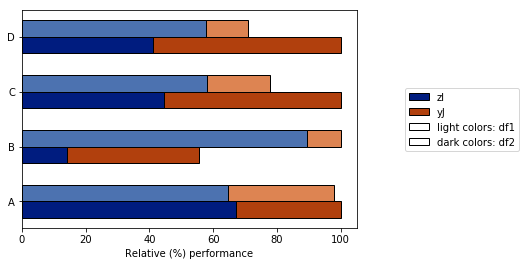

In [4]:
ax, fig = lsg.plot_grouped_stackedbars(comp, ix_categories='Criteria', ix_entities_compared='Scenarios', norm='max')
_ = ax.xaxis.set_label_text('Relative (%) performance')

## LCA Example: two technologies (tech1 and tech2), compared in terms of 3 environmental impacts, and broken down in terms of life-cycle stages (colors), normalized proportionately to technology 1

Note that columns are, again, _not_ in alphabetical order

In [5]:
df1 = pd.read_csv('demoData_2technologies_ordered.csv', index_col=[0,1])
df1

,,infrastructure,fuel provision,operation,pollution control,transmission,ccs
Impact category,Technology,,,,,,
Ammonia emissions,tech1,22.222222,11.111111,33.333333,50.000000,66.666667,5.555556
Ammonia emissions,tech2,38.888889,22.222222,55.555556,77.777778,100.000000,11.111111
Carbon monoxide emission,tech1,16.666667,11.111111,27.777778,38.888889,50.000000,5.555556
Carbon monoxide emission,tech2,66.666667,44.444444,77.777778,88.888889,100.000000,22.222222
Climate change,tech1,16.666667,11.111111,27.777778,38.888889,50.000000,5.555556
Climate change,tech2,66.666667,44.444444,77.777778,88.888889,100.000000,22.222222


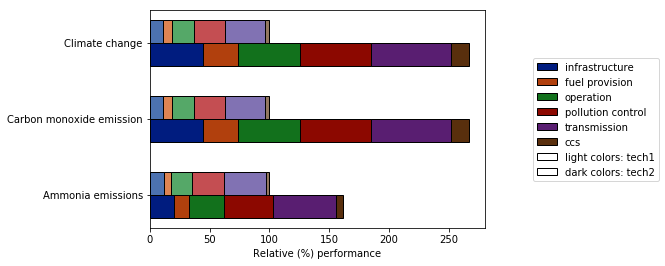

In [6]:
ax, fig = lsg.plot_grouped_stackedbars(df1, ix_categories='Impact category', 
                                            ix_entities_compared='Technology', norm='tech1')
_ = ax.xaxis.set_label_text('Relative (%) performance')

### Robust to different order? yes

Even if the `tech1` and `tech2` rows are out of order, the graph still makes sense. Note that tech2 appears first in the legend, and is now the "pale" option, but the graph remains internally consistent.

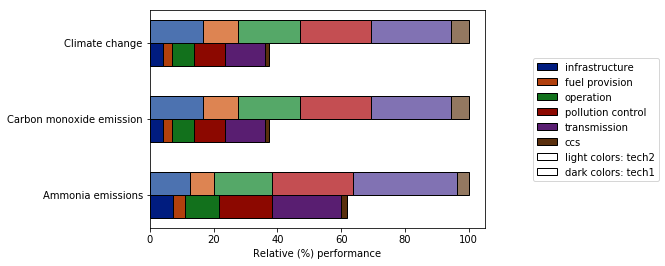

In [7]:
comp2 = pd.read_csv('demoData_2technologies_disordered.csv', index_col=[0,1])
ax, fig = lsg.plot_grouped_stackedbars(comp2, ix_categories='Impact category', 
                                              ix_entities_compared='Technology')
_ = ax.xaxis.set_label_text('Relative (%) performance')

# 3 technologies compared, with error bars.

With three entities compared, the legend adapts to light, medium, and dark shades

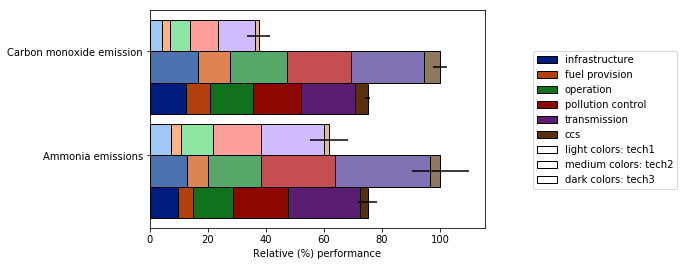

In [8]:
comp3 = pd.read_csv('demoData_3technologies_ordered.csv', index_col=[0,1])
ax, fig = lsg.plot_grouped_stackedbars(comp3, ix_categories='Impact category',
                                              ix_entities_compared='Technology', 
                                              err_pos='err_pos', err_neg='err_neg')
_ = ax.xaxis.set_label_text('Relative (%) performance')

# N technologies compared
If more than 3 entities/technologies are being compared, the light/medium/dark shades are not sufficient, and we need to shift to a different strategy.

In [9]:
df4 = pd.read_csv('demoData_ntechnologies_ordered.csv',index_col=[0,1])
_ = lsg.plot_grouped_stackedbars(df4, ix_categories='Impact category',
                                      ix_entities_compared='Technology')

Warning. Too many entities being compared. Please use `plot_grouped_stackedbars_wlargegroups()` instead.



With `plot_grouped_stackedbars_wlargegroups()`, we rely on a completely different mechanism in seaborn to generate the color/shading gradient. Also, the legend is different. Unfortunately, this function does *not* support error bars.

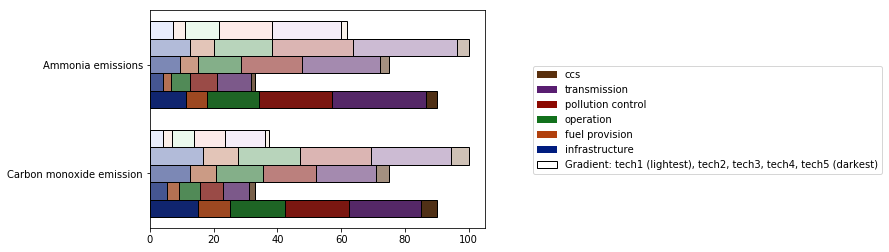

In [10]:
_ = lsg.plot_grouped_stackedbars_wlargegroups(df4, ix_categories='Impact category',
                                                   ix_entities_compared='Technology')